# **Maestría en Analítica de Negocios - MBD**

## **Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad en Equipos

### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas de los integrantes del equipo:**
Karla Sofía Díaz Malpica - A01410826

Luisiana Diaz - A01138281

Agustín Leurette Vázquez - A01105758

Javier Rivera - A01451682

Ney Oliveira López - A01451698

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [95]:
# Aquí puedes incluir alguna otra librería que requieras durante esta actividad:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import zipfile
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


In [96]:
# Cargamos los datos:

url = "https://archive.ics.uci.edu/static/public/522/south+german+credit.zip"
response = requests.get(url)

if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall("Data")
    print("Zip file downloaded and extracted successfully.")
else:
    print("Failed to download the zip file.")

Zip file downloaded and extracted successfully.


In [97]:
# Identificamos que el archivo de texto ASCII contiene el dataset requerido:

with open("/content/Data/SouthGermanCredit.asc", "r") as archivo:
    data = archivo.readlines()
print(data)

['laufkont laufzeit moral verw hoehe sparkont beszeit rate famges buerge wohnzeit verm alter weitkred wohn bishkred beruf pers telef gastarb kredit\n', '1 18 4 2 1049 1 2 4 2 1 4 2 21 3 1 1 3 2 1 2 1\n', '1 9 4 0 2799 1 3 2 3 1 2 1 36 3 1 2 3 1 1 2 1\n', '2 12 2 9 841 2 4 2 2 1 4 1 23 3 1 1 2 2 1 2 1\n', '1 12 4 0 2122 1 3 3 3 1 2 1 39 3 1 2 2 1 1 1 1\n', '1 12 4 0 2171 1 3 4 3 1 4 2 38 1 2 2 2 2 1 1 1\n', '1 10 4 0 2241 1 2 1 3 1 3 1 48 3 1 2 2 1 1 1 1\n', '1 8 4 0 3398 1 4 1 3 1 4 1 39 3 2 2 2 2 1 1 1\n', '1 6 4 0 1361 1 2 2 3 1 4 1 40 3 2 1 2 1 1 1 1\n', '4 18 4 3 1098 1 1 4 2 1 4 3 65 3 2 2 1 2 1 2 1\n', '2 24 2 3 3758 3 1 1 2 1 4 4 23 3 1 1 1 2 1 2 1\n', '1 11 4 0 3905 1 3 2 3 1 2 1 36 3 1 2 3 1 1 2 1\n', '1 30 4 1 6187 2 4 1 4 1 4 3 24 3 1 2 3 2 1 2 1\n', '1 6 4 3 1957 1 4 1 2 1 4 3 31 3 2 1 3 2 1 2 1\n', '2 48 3 10 7582 2 1 2 3 1 4 4 31 3 2 1 4 2 2 2 1\n', '1 18 2 3 1936 5 4 2 4 1 4 3 23 3 1 2 2 2 1 2 1\n', '1 6 2 3 2647 3 3 2 3 1 3 1 44 3 1 1 3 1 1 2 1\n', '1 11 4 0 3939 1 3 1 

In [98]:
# Establecemos el archivo de texto ASCII como el dataframe a usar:
df = pd.read_csv("/content/Data/SouthGermanCredit.asc", delim_whitespace=True, header=0)
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [99]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Incluye aquí tu código:*****************************

col_mapping = {
    "laufkont": "status",
    "laufzeit": "duration",
    "moral": "credit_history",
    "verw": "purpose",
    "hoehe": "amount",
    "sparkont": "savings",
    "beszeit":"employment_duration",
    "rate": "installment_rate",
    "famges": "personal_status_sex",
    "buerge": "other_debtors",
    "wohnzeit": "present_residence",
    "verm": "property",
    "alter": "age",
    "weitkred": "other_installment_plans",
    "wohn": "housing",
    "bishkred": "number_credits",
    "beruf": "job",
    "pers": "people_liable",
    "telef": "telephone",
    "gastarb": "foreign_worker",
    "kredit": "credit_risk"
    }

df.rename(columns=col_mapping, inplace=True)
df.columns = [x.lower() for x in df.columns]

df.head()

# *********** Aquí termina la sección de agregar código *************

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [100]:
#Validamos que la df no tenga datos faltantes

df.isnull().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

In [101]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0.
# Como las técnicas de balanceo y en general en lo problemas de Machine Learning a la clase de interés y generalmente
# la clase minoritaria se le etiqueta como 1. Entonces invirtamos dichos regitros.
# Recuerda que esta base de datos es de principios de los años 90s, donde la estandarización de los datos todavía
# no estaba estandarizada y cada quien etiquetaba los datos a su mejor parecer.

df["credit_risk"] = df["credit_risk"].map({0:1, 1:0})
print(df["credit_risk"].value_counts())

0    700
1    300
Name: credit_risk, dtype: int64


### ¿Con base a la información de la variable de salida, “credit_risk”, ¿consideras que estamos con un problema de cases desbalanceadas? Justifica tu respuesta.

Fundamentado en la información de la variable de salida, en la que se indica que hay 700 instancias de la etiqueta 0 (good) y 300 de la etiqueta 1 (bad), podemos establecer que existe un desbalance de clases.

Idóneamente debe existir una proporción 1:1 en el conjunto de datos, pero la proporción actual es 2.33:1, lo que sugiere que la clase negativa es dos veces más común que la clase positiva.

Este desequilibrio puede resultar en una situación donde los modeloS de ML contendrán más sesgo en términos de precisión predictiva del lado de la clase mayoritaria, dado que está aprendiendo más de ese subconjunto de clases, ya que los modelos no habrían sido expuestos a suficientes ejemplos de la clase minoritaria durante el entrenamiento; por lo tanto, la predicción para la clase minoritaria podría no ser precisa.

## **Ejercicio 2**

In [102]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Incluye aquí tu código:*****************************

from sklearn.model_selection import train_test_split

# Bajo la distribución de que "X" son las características y "y" es la variable predictora "credit_risk":
y = df["credit_risk"]
X = df.drop("credit_risk", axis=1)

# Primero, dividimos los datos en un conjunto de entrenamiento y otro temporal que combine validación y prueba:
Xtrain, X_temp, ytrain, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)

# Luego, dividimos el conjunto temporal en validación y prueba:
Xval, Xtest, yval, ytest = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 3**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### **Variables Categóricas:**

* status: El estado de la cuenta del deudor con un banco.
* credit_history: El historial de créditos anteriores o crédito actual del contrato. Sin un orden jerárquico claro.
* purpose: La razón detrás del crédito.
* personal_status_sex: Información sobre el sexo y el estado civil del deudor.
* other_debtors: Otro deudor para el crédito.
* other_installment_plans: Cualquier otra obligación de crédito o cuota adicional al banco que otorga el crédito.
* telephone: El estatus de tener una línea telefónica fija registrada a nombre del deudor.
* foreign_worker: Si el deudor es un trabajador extranjero.
* credit_risk: Bueno o Malo, refiriéndose a la calificación del riesgo crediticio del deudor. Esta es nuestra variable predictora

### **Variables Ordinales (y/o discretizadas):**

* savings: Ahorros totales del deudor. Codificado en valores ascendentes.
* employment_duration: La duración del empleo del deudor con la organización actual.
* installment_rate: Las cuotas de crédito del deudor como porcentaje de sus ingresos.
* present_residence: La duración de la residencia en el domicilio actual.
* property: Clasificación de la propiedad del deudor con valor en orden ascendente.
* housing: Describe si su residencia es gratis, rentada o propia. Valor ordinal ascendente.
* number_credits: El historial completo de créditos tomados. En cantidades y rangos ascendentes.
* job: El nivel del empleo del deudor y nivel de habilidad en orden ascendente, desde "sin empleo/sin habilidad", hasta "gerente/altamente calificado"


### **Variables Numéricas:**

* age: La edad del deudor.
* duration: La duración del crédito en meses.
* amount: El monto total del crédito.
* people_liable: El número total de personas que dependen financieramente del deudor.

## **Ejercicio 4**

In [103]:
df["savings"].unique()

array([1, 2, 3, 5, 4])

In [104]:
df["people_liable"].unique()

array([2, 1])

In [105]:
# Define una lista que incluya solamente las variables categóricas de
# entrada, de acuerdo a la selección que hiciste en el ejercicio anterior.
# La llamaremos “lista_Xcat” y la usaremos para desplegar los niveles de
# cada una de estas variables:

# ************* Incluye aquí tu código:*****************************

# Generamos lista excluyendo variable predictora del listado:

lista_Xcat = ['status',                   #Categórica debido a que indica el status de la cuenta con el banco
              "credit_history",           #Cataloga el tipo de historial crediticio sin una lógica jerárquica clara (con retraso, con créditos en otros bancos, buen pago hasta ahora, etc)
              'purpose',                  #Señala el propósito del crédito (Auto, reparaciones, vacaciones, etc)
              'personal_status_sex',      #Cataloga en base a sexo/estado marital
              'other_debtors',            #Cataloga en base a si el cliente tiene otros deudores
              'other_installment_plans',  #Cataloga en base a si el cliente tiene otros planes de pagos (tiendas departamentales, bancos, ninguno)
              'telephone',                #Cataloga en base a si el cliente tiene teléfono propio o no
              'foreign_worker']           #Cataloga en base a si el cliente es un trabajador extranjero o no

# *********** Aquí termina la sección de agregar código *************


for w in lista_Xcat:
  print(Xtrain[w].value_counts().values)
  print(Xtrain[w].value_counts() / Xtrain.shape[0])
  print('\n')

[272 199 184  45]
4    0.388571
1    0.284286
2    0.262857
3    0.064286
Name: status, dtype: float64


[371 213  62  30  24]
2    0.530000
4    0.304286
3    0.088571
1    0.042857
0    0.034286
Name: credit_history, dtype: float64


[196 176 126  64  59  39  15  10   9   6]
3     0.280000
0     0.251429
2     0.180000
9     0.091429
1     0.084286
6     0.055714
5     0.021429
10    0.014286
4     0.012857
8     0.008571
Name: purpose, dtype: float64


[395 209  63  33]
3    0.564286
2    0.298571
4    0.090000
1    0.047143
Name: personal_status_sex, dtype: float64


[631  38  31]
1    0.901429
3    0.054286
2    0.044286
Name: other_debtors, dtype: float64


[572  95  33]
3    0.817143
1    0.135714
2    0.047143
Name: other_installment_plans, dtype: float64


[412 288]
1    0.588571
2    0.411429
Name: telephone, dtype: float64


[671  29]
2    0.958571
1    0.041429
Name: foreign_worker, dtype: float64




## **Ejercicio 5**

In [106]:
# De acuerdo con la información de las variables categóricas desplegada en el
# ejercicio anterior, identifica las variables que tienen niveles abajo del 3%
# de información. Con cada una de estas variables identificadas utiliza la
# función map() de Python para agrupar dichos niveles en un nuevo nivel, de
# manera que se tenga ahora una cantidad mayor o igual al 3% de información:


# ************* Incluye aquí tu código:*****************************

# Generamos un diccionario para almacenar resultados:
resultados = {}

# Calculamos el porcentaje de cada nivel y filtramos los niveles con menos del 3% de datos:
for variable in lista_Xcat:
    level = Xtrain[variable].value_counts(normalize=True)
    below_level = level[level < .03]
# Si hay niveles bajos, los guardamos en el diccionario de resultados:
    if not below_level.empty:
        resultados[variable] = below_level

# Mostramos los resultados:
for variable, level in resultados.items():
    print(f"Variable '{variable}' tiene niveles por debajo del 3%:\n{level}\n")

# Iteramos sobre las variables identificadas:
for variable in resultados.keys():
#Creamos otro diccionario de mapeo para la variable actual:
    mapeo = {nivel: "Other" for nivel in resultados[variable].index}

# Actualizamos el DataFrame con el mapeo de los niveles según el diccionario y usamos "map"
# Aseguramos que los niveles no especificados en el diccionario se mantengan iguales:
Xtrain[variable] = Xtrain[variable].map(lambda x: mapeo.get(x, x))

# *********** Aquí termina la sección de agregar código *************

Variable 'purpose' tiene niveles por debajo del 3%:
5     0.021429
10    0.014286
4     0.012857
8     0.008571
Name: purpose, dtype: float64



## **Ejercicio 6**

In [107]:
# Solamente para el o los factores que modificaste en el ejercicio anterior
# despliega la cantidad porcentual de información que tienes ahora en cada
# nivel, para comprobar que efectivamente todos quedaron arriba del 3%:


# ************* Incluye aquí tu código:*****************************

# Mostramos cómo quedaron las categorías después del mapeo:
print(Xtrain["purpose"].value_counts().values)
print(Xtrain["purpose"].value_counts() / Xtrain.shape[0])

# *********** Aquí termina la sección de agregar código *************

[196 176 126  64  59  40  39]
3        0.280000
0        0.251429
2        0.180000
9        0.091429
1        0.084286
Other    0.057143
6        0.055714
Name: purpose, dtype: float64


## **Ejercicio 7**

### **Justifica el procedimiento realizado en el ejercicio 5, En particular, indica en qué puede ayudar al problema y cuáles podrían ser sus inconvenientes:**

Al agrupar los niveles inferiores al 3% mediante mapeo para ayudar en el preprocesamiento de los datos, se pueden esperar varios resultados:

* Reducción de la varianza, ya que los niveles de baja representación pueden agregar variabilidad a los modelos e impactar su generalización.
* Prevención del overfit, porque al reducir el número de categorías, podemos reducir el sobreajuste a muestras pequeñas o específicas de los datos.
* Mejora y equilibrio de la distribución de frecuencias, lo que permite desplegar modelos más equilibrados.
* Facilidad de la comprensión del efecto de las variables categóricas en los modelos.

Los posibles inconvenientes son:

* Sesgo en el modelo y pérdida de información, ya que si los niveles pequeños realmente tienen impacto sobre la variable objetivo, entonces la agrupación puede distorsionarlo.
* Impacto en resultados del modelo, ya que relacionado al punto anterior, si el modelo depende críticamente de la información contenida en las categorías inusuales o pequeñas, entonces agruparlas podría reducir su precisión.
* Interpretación sesgada o errónea, si las agrupaciones contienen o abarcan categorías muy heterogéneas.
* Decisión arbitraria, ya que el 3% puede suponer una definición subjetiva e injustificada que no aplica para todos los casos y conjuntos de datos.

## **Ejercicio 8**

### **Para evitar el filtrado de información realiza ahora la misma transformación del ejercicio 5 a la(s) misma(s) variable(s) en los conjuntos de validación y de prueba.**

In [108]:
# ************* Incluye aquí tu código:*****************************

# Aplicamos el mapeo a cada variable en el conjunto de validación "Xval":
for variable in lista_Xcat:
# Verificamos si la variable está en el diccionario de resultados:
    if variable in resultados:
# Obtenemos el mapeo para la variable actual:
        mapeo = {nivel: "Other" for nivel in resultados[variable].index}
# Aplicamos el mapeo al conjunto de validación:
        Xval[variable] = Xval[variable].map(lambda x: mapeo.get(x, x))
# Verificamos los resultados:
print(Xval["purpose"].value_counts(normalize=True))

# *********** Aquí termina la sección de agregar código *************

3        0.286667
2        0.226667
1        0.173333
0        0.153333
9        0.093333
6        0.033333
Other    0.033333
Name: purpose, dtype: float64


In [109]:
# ************* Incluye aquí tu código:*****************************

# Aplicamos el mapeo a cada variable en el conjunto de validación "Xval":
for variable in lista_Xcat:
# Verificamos si la variable está en el diccionario de resultados:
    if variable in resultados:
# Obtenemos el mapeo para la variable actual:
        mapeo = {nivel: "Other" for nivel in resultados[variable].index}
# Aplicamos el mapeo al conjunto de validación:
        Xtest[variable] = Xtest[variable].map(lambda x: mapeo.get(x, x))
# Verificamos los resultados:
print(Xtest["purpose"].value_counts(normalize=True))

# *********** Aquí termina la sección de agregar código *************

3        0.273333
0        0.233333
2        0.140000
9        0.126667
1        0.120000
Other    0.066667
6        0.040000
Name: purpose, dtype: float64


## **Ejercicio 9**

In [110]:
#	Define una lista que incluya solamente las variables de entrada que identificaste
# como ordinales en el ejercicio 3 y otra para las numéricas. La llamaremos
# “lista_Xord” y "lista_Xnum" y la usaremos para visualizar su información:

# ************* Incluye aquí tu código:*****************************

# Lista de variables ordinales:
lista_Xord = [
    "savings",              #Ahorros totales del deudor. Codificado en rangos con valores ascendentes.
    "employment_duration",  #La duración del empleo del deudor con la organización actual. Codificado en rangos con valores ascendentes.
    "installment_rate",     #Las cuotas de crédito del deudor como porcentaje de sus ingresos. Orden ascendente.
    "present_residence",    #Rangos de años en la residencia actual codificados en orden ascendente.
    "property",             #Clasificación de la propiedad del deudor con valor en orden ascendente.
    "housing",              #Describe si su residencia es gratis, rentada o propia. Valor ordinal ascendente.
    "number_credits",       #El historial completo de créditos tomados. En cantidades y rangos ascendentes.
    "job",                  #El nivel del empleo del deudor y nivel de habilidad en orden ascendente, desde "sin empleo/sin habilidad", hasta "gerente/altamente calificado"
]

# Lista de variables numéricas:
lista_Xnum = [
    "age",          #La edad del deudor
    "duration",     #La duración del crédito en meses.
    "amount",       #El monto total del crédito.
    "people_liable" #El número total de personas que dependen financieramente del deudor.
]


# *********** Aquí termina la sección de agregar código *************

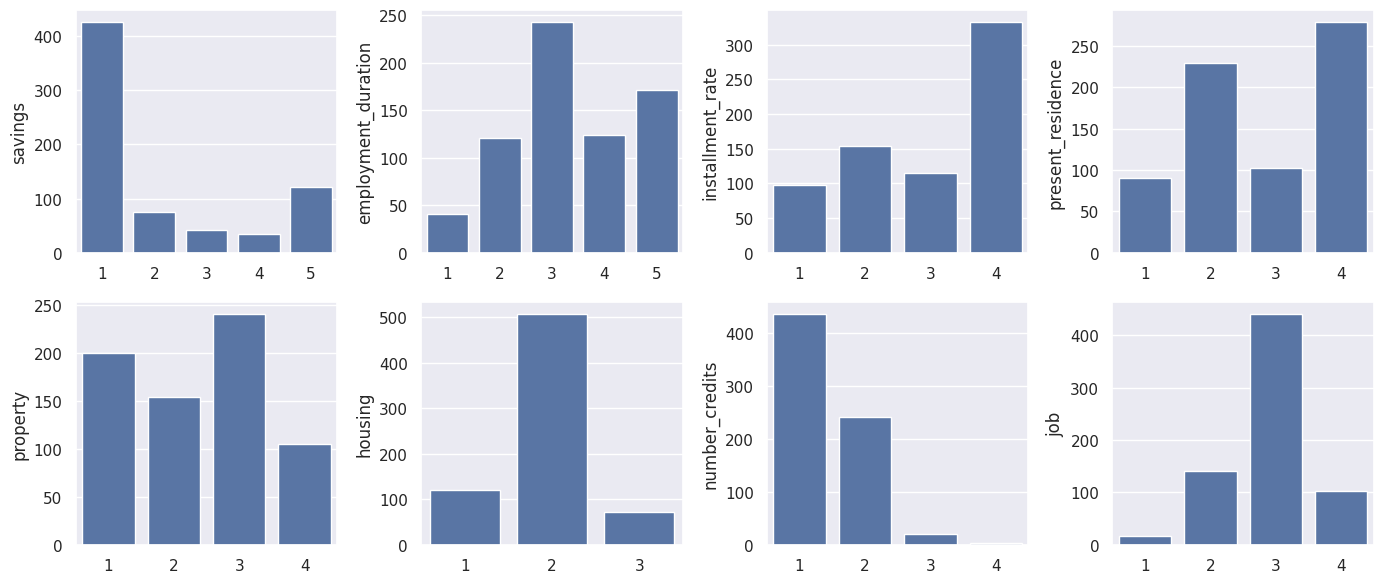

In [111]:
# Visualizamos la información de las variables ordinales en gráficos de barra
# a partir de la lista que definiste arriba y solo del conjunto de
# entrenamiento para evitar el filtrado de información:

import seaborn as sns

sns.set(rc={"figure.figsize":(14,6)})
fig, axes = plt.subplots(2,4)
for k,w in enumerate(lista_Xord):
  plt.subplot(2,4,k+1)
  ax = sns.barplot(Xtrain[w].value_counts())
  fig.tight_layout()
plt.show()

# NOTA: No tienen que ser 8 los gráficos, si definiste como ordinales una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

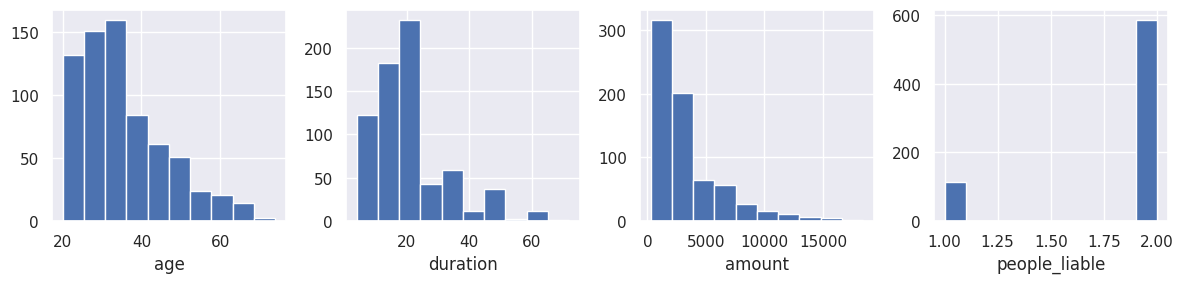

In [112]:
# Visualizamos la información de las variables numéricas en histogramas
# a partir de la lista que definiste arriba, y solo del conjunto de
# entrenamiento para evitar el filtrado de información:

sns.set(rc={"figure.figsize":(12,3)})
fig, axes = plt.subplots(1,4)
tmp = Xtrain[lista_Xnum]
for k in range(0,4):
  plt.subplot(1,4,k+1)
  plt.hist(tmp[tmp.columns[k]])
  xlabels = list(tmp.value_counts().index)
  plt.xlabel(tmp.columns[k])
  fig.tight_layout()
plt.show()

# NOTA: No tienen que ser 4 los gráficos, si definiste como numéricas una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

### **¿Qué conclusiones puedes obtener de estos gráficos?**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Se puede apreciar que las variables numéricas están sesgadas. "age", "duration" y "amount" están cargadas hacia valores inferiores. La variable "people_liable" la cual contiene solo 2 posibles valores: 1 y 2, está considerablemente cargada hacia los casos en que el registro es "2".





# **Ejercicio 10**

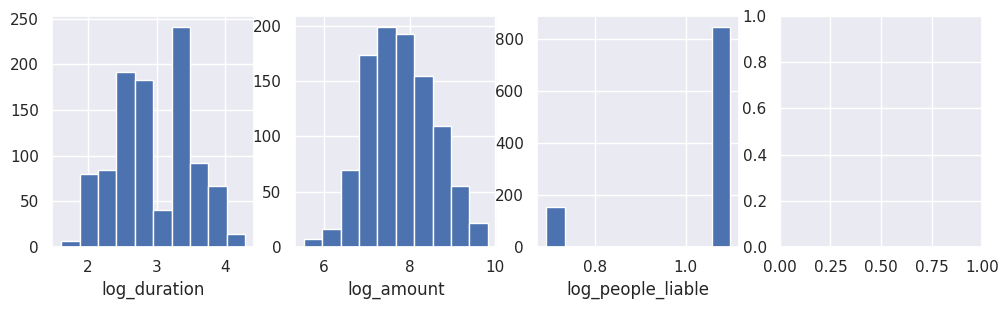

In [113]:
# Como primera aproximación encuentra qué transformación ajusta mejor los
# datos para corregir el sesgo de las variables numéricas. Deberás seleccionar
# una entre las funciones de Numpy de logaritmo, log(), o alguna de las
# potencias, power(), únicamente.
# Por el momento no aplicaremos una transformación para escalar los datos.

# ************* Incluye aquí tu código:*****************************

tmpTransf = pd.DataFrame()

# Aplicamos np.log para "duration", "amount" y "people_liable" añadiendo 1 para evitar el logaritmo de cero:
tmpTransf["log_duration"] = np.log(df["duration"] + 1)
tmpTransf["log_amount"] = np.log(df["amount"] + 1)
tmpTransf["log_people_liable"] = np.log(df["people_liable"] + 1)

# Para "age", con base en la conclusión anterior parece que la distribución es bastante simétrica, por lo que podría no ser necesaria una transformación.
# Sin embargo, probaremos con una transformación logarítmica también:
tmpTransf["log_age"] = np.log(df["age"] + 1)

# *********** Aquí termina la sección de agregar código *************

sns.set(rc={"figure.figsize":(12,3)})
fig, axes = plt.subplots(1,4)

for k in range(0,3):
  plt.subplot(1,4,k+1)
  plt.hist(tmpTransf[tmpTransf.columns[k]] )  # graficamos cada columna de datos transformada
  xlabels = list(tmpTransf.value_counts().index)
  plt.xlabel(tmpTransf.columns[k])
plt.show()

# NOTA: No tienen que ser 4 los gráficos, si definiste como numéricas una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

### **¿Sí conviene aplicar alguna de estas transformaciones? Justifica tu respuesta.**

* La transformación logarítmica aplicada a "duration" y "amount" parece haber contribuido a reducir el sesgo y a que las variables sean más simétricas en comparación con las variables originales. Sin embargo, en el caso de "duration", todavía podría haber oportunidad de mejora.
* En el caso de "age", el resultado de la transformación parece representar una distribución diferente, con tendencia a ser bimodal, que podría representar tanto el hallazgo de dos grupos de edades más comunes que el resto, o por el contrario, podría estar contribuyendo a dar una impresión errónea de cómo están distribuidos realmente los datos.
* Por lo tanto, podemos concluir que las tranformaciones mejoraron la forma de las distribuciones para "duration" y "amount", contribuyendo a hacerlas más adecuadas para el entrenamiento de los modelos. En el caso de "age", es probable que la transformación no sea una opción adecuada considerando su distribución original.

# **Parte II : Entrenamiento de los modelos**

## **Ejercicio 11**

In [114]:
# Conjuntamos todas las transformaciones que aplicaremos a nuestras variables
# usando la clase Pipeline y el ColumnTransformer de sklearn, , donde las
# variables ordinales las dejaremos sin transformar.

# ************* Incluye aquí tu código:**************************************

# a) A las variables numéricas, aplica la transformación que seleccionaste en el ejercicio 10:

from sklearn.preprocessing import FunctionTransformer

# Creamos un transformador que aplicará la transformación logarítmica.
# Añadimos 1 automáticamente para evitar el logaritmo de cero con np.log1p:
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Lista de variables numéricas a transformar

lista_Xnum = ['age', 'duration', 'amount', 'people_liable']

# Crear el pipeline para las variables numéricas
num_pipeline = Pipeline(steps=[
    ('log_transform', log_transformer)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, lista_Xnum)
    ],
    remainder='passthrough'
)

# b) A las variables categóricas aplica la transformación OneHotEncoder() de
#    sklearn con los argumentos que consideres adecuados.
#    Justifica la selección de dichos argumentos:

lista_Xcat = ['status',                   #Categórica debido a que indica el status de la cuenta con el banco
              "credit_history",           #Cataloga el tipo de historial crediticio sin una lógica jerárquica clara (con retraso, con créditos en otros bancos, buen pago hasta ahora, etc)
              'purpose',                  #Señala el propósito del crédito (Auto, reparaciones, vacaciones, etc)
              'personal_status_sex',      #Cataloga en base a sexo/estado marital
              'other_debtors',            #Cataloga en base a si el cliente tiene otros deudores
              'other_installment_plans',  #Cataloga en base a si el cliente tiene otros planes de pagos (tiendas departamentales, bancos, ninguno)
              'telephone',                #Cataloga en base a si el cliente tiene teléfono propio o no
              'foreign_worker']           #Cataloga en base a si el cliente es un trabajador extranjero o no

cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist', drop='first'))
])

cat_pipe_nombres = lista_Xcat


# *********** Aquí termina la sección de agregar código **********************


# Conjuntemos las transformaciones de todo tipo de variable y
# dejaremos sin procesar las ordinales, que ya están de manera adecuada, en general.

log_transformer = FunctionTransformer(np.log1p, validate=True)
lista_Xnum = ['age', 'duration', 'amount', 'people_liable']
lista_Xcat = ['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'telephone', 'foreign_worker']

# Crear el pipeline para las variables numéricas
num_pipeline = Pipeline(steps=[
    ('log_transform', log_transformer)
])

# Crear el pipeline para las variables categóricas
cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, lista_Xnum),
        ('cat', cat_pipeline, lista_Xcat)
    ],
    remainder='passthrough'
)

columnasTransformer = ColumnTransformer(transformers = [('num', num_pipeline, lista_Xnum),
        ('cat', cat_pipeline, lista_Xcat)
    ],
    remainder='passthrough'
)

In [115]:
# Veamos cuántas variables de más se están agregando por la transformación OneHotEncoder:

# Ajustar OneHotEncoder a las variables categóricas para determinar el número de categorías únicas
encoder = OneHotEncoder(handle_unknown='infrequent_if_exist', drop='first').fit(df[lista_Xcat])

# Calcular el número total de nuevas variables después de aplicar OneHotEncoder, menos el número de variables originales
nuevas_variables = sum([len(cats) - 1 for cats in encoder.categories_]) - len(lista_Xcat)

print(f"Se están agregando {nuevas_variables} variables adicionales por la transformación OneHotEncoder.")

Se están agregando 17 variables adicionales por la transformación OneHotEncoder.


In [116]:
#Explica el efecto que tienen los dos argumentos de OHE que se te indicaron en el inciso anterior.

## 1.- handle_unknown='infrequent_if_exist'

Define cómo el codificador debe reaccionar a los datos nuevos no vistos durante el ajuste del modelo. El codificador manejará cualquier categoría desconocida encontrada durante la transformación asignándola a una categoría especial para valores infrecuentes si existe. Si no hay tal categoría porque todas las categorías fueron frecuentes en el entrenamiento, se generará un error

## 2.- drop='first

Controla la eliminación de la primer categoría binaria al aplicar One Hot Encoding para evitar la colinealidad. Esto, debido a que la categoría eliminada puede inferirse a partir de las categorías restantes. Suponiendo que se transformen las clases "verde", "azul" y "rojo" en categorías binarias con OHE, se puede inferir que el registro es "verde" si las clases de "azul" y "rojo" son negativas.

# **Ejercicio 12**

### **Con respecto al caso de un modelo subentrenado y en relación a la información de nuestro problema, responde la siguiente pregunta: ¿debajo de qué valor porcentual podemos decir que nuestro modelo estará subentrenado?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

La determinación de si un modelo está subentrenado se puede hacer a partir de un análisis de su matriz de confusión. Si sus valores de precisión están cerca de 1 y sus valores de recall están cerca de 0 para esto es un indicador de subentrenamiento.

### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 13**

En este ejercicio deberás encontrar los hiperparámetros para obtener el mejor desempeño de
cada modelo con respecto a la métrica de la Exactitud (Accuracy). Recuerda que debes buscar
que no esté sobreentrenado o subentrenado cada modelo, de acuerdo con la información dada
en el ejercicio anterior. Sin embargo, estaremos desplegando una serie de otras métricas como
información adicional en el desempeño del modelo.

In [117]:
Xtrainval, Xtest, ytrainval, ytest = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=0)

In [118]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.Verifica
# además de que no queden subenetrenados o sobreentrenados con respecto a la
# métrica de la Exactitud (Accuracy).
# Te recomiendo que en todos aquellos modelos que tengan la opción
# del "random_state", lo utilices. Esto ayudará a que la variabilidad que se
# observe sea en lo posible, debida solamente al ajuste que estemos realizando
# en algún hiperparámetro y no por el proceso aleatorio en sí del entrenamiento.
# Consulta en dado caso la documentación de cada modelo para la mejor
# comprensión de los hiperparámetros que desees ajustar.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #

  # Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear', random_state=0, C=1, penalty='l2'))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(max_depth=None, random_state=0, min_samples_split=2, min_samples_leaf=1))
  nombres.append('DTree')

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(n_estimators=100, random_state=0, max_depth=None, min_samples_split=2, min_samples_leaf=1))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0, n_estimators=100, learning_rate=0.1, max_depth=3))
  nombres.append('XGBoost')

  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(max_iter=2000, random_state=0, hidden_layer_sizes=(100,), activation='relu', solver='adam'))
  nombres.append('MLP')

  # Máquina de Vectores de Soporte:
  modelos.append(SVC(kernel='linear', random_state=0, C=1))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************


  return modelos, nombres





# Entrenamos cada uno de los modelos y desplegamos la métricas de Train y Val.
# NOTA: Observa que el método de Validación-Cruzada llama a los resultados
#       del conjunto de validación como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=5)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.nanmean(scores[k]),np.nanstd(scores[k])))


>> LR
	 test_accuracy 0.759 (0.030)
	 train_accuracy 0.791 (0.007)
	 test_roc_auc 0.790 (0.036)
	 train_roc_auc 0.828 (0.008)
	 test_f1 0.542 (0.068)
	 train_f1 0.605 (0.017)
	 test_precision 0.628 (0.065)
	 train_precision 0.696 (0.014)
	 test_recall 0.480 (0.076)
	 train_recall 0.536 (0.021)
>> kNN
	 test_accuracy 0.735 (0.014)
	 train_accuracy 0.813 (0.011)
	 test_roc_auc 0.675 (0.035)
	 train_roc_auc 0.854 (0.011)
	 test_f1 0.469 (0.048)
	 train_f1 0.630 (0.023)
	 test_precision 0.588 (0.036)
	 train_precision 0.778 (0.027)
	 test_recall 0.393 (0.062)
	 train_recall 0.529 (0.026)
>> DTree
	 test_accuracy 0.673 (0.030)
	 train_accuracy 1.000 (0.000)
	 test_roc_auc 0.621 (0.033)
	 train_roc_auc 1.000 (0.000)
	 test_f1 0.471 (0.051)
	 train_f1 1.000 (0.000)
	 test_precision 0.461 (0.048)
	 train_precision 1.000 (0.000)
	 test_recall 0.489 (0.079)
	 train_recall 1.000 (0.000)
>> RF
	 test_accuracy 0.758 (0.027)
	 train_accuracy 1.000 (0.000)
	 test_roc_auc 0.782 (0.027)
	 train_roc_auc

## **Ejercicio 14**

### **De acuerdo a la información del problema, se tiene una matriz de costo que pondera diferente los Falsos Positivos y los Falsos Negativos.**

### **De acuerdo a la información de dicha matriz de costo, contesta las siguientes preguntas:**



### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   a.	¿Qué error se considera que es el más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

NOTA: Considera el etiquetado de las clases de acuerdo a nuestro problema.

El error más costoso para el banco serían los Falsos Negativos, es decir, los casos en que el modelo prediga que el cliente no representa riesgo de inclumplimiento de pago, pero que el cliente en realidad si sea riesgoso, provocando que se le preste dinero que al final no estaría devolviendo al banco.

*   b.	¿Cuál o cuáles sería entonces la métrica o métricas a considerar como más importantes?

La métrica más importante sería el Recall (porcentaje en que el modelo identifica a los verdaderos positivos entre todos los casos en que los clientes en realidad son riesgosos). Mantener un buen rendimiento de recall significa minimizar los falsos negativos, lo cual disminuye el riesgo de que se le preste dinero a clientes que después no van a pagar al banco.

La precisión también sería importante (porcentaje en que el modelo identifica a los clientes riesgosos exitosamente entre el total de predicciones positivas del modelo). Esto ayuda a que el modelo no rechace demasiados clientes por detectarlos equivocadamente como de alto riesgo, ya que esto limitaría la capacidad del banco de otorgar créditos lo cual disminuiría su capacidad de cobrar intereses.


### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 15**

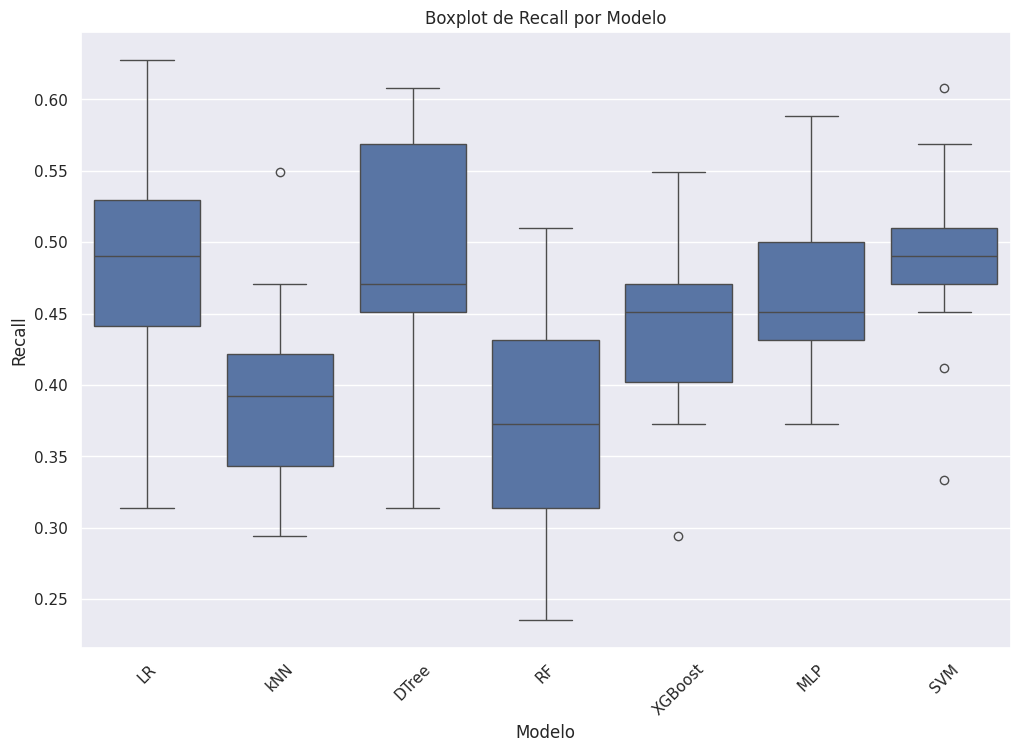

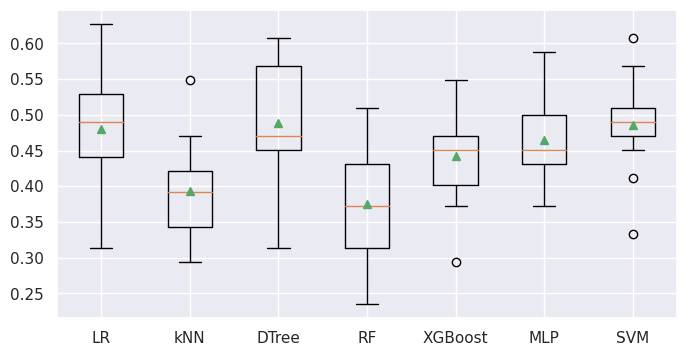

In [119]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos
# y los resultados de los conjuntos de validación, con respecto a la métrica que
# consideraste más importante en el ejercicio anterior. Para ello proporciona el
# nombre (string) de la métrica del conjunto de validación que consideraste más
# importante en el ejercicio anterior.

# ************* Inlcuye aquí tu código:**************************

str_mejor_metrica = "test_recall"

recall_scores = []

for i, scores in enumerate(resultados):
    for score in scores['test_recall']:
        recall_scores.append({'Modelo': nombres[i], 'Recall': score})

df_scores = pd.DataFrame(recall_scores)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Modelo', y='Recall', data=df_scores)
plt.title('Boxplot de Recall por Modelo')
plt.ylabel('Recall')
plt.xlabel('Modelo')
plt.xticks(rotation=45)  # Esto puede ayudar si los nombres de los modelos son largos
plt.show()

# *********** Aquí termina la sección de agregar código *************



sns.set(rc={'figure.figsize':(8,4)})
databox = [resultados[j][str_mejor_metrica] for j in range(len(resultados))]


plt.boxplot(databox, labels=nombres, showmeans=True)
plt.show()


# **Ejercicio 16**

In [120]:
# A partir de los mejores hiperparámetros obtenidos en el ejercicio anterior,
# selecciona el modelo de balanceo que consideres da el mejor desempeño.
# Deberás seleccionar entre el SMOTE, TomekLinks y SMOTEENN de ImbalancedLearn.
# Prueba cada uno de estos métodos de muestreo y/o submuestreo para que veas el
# desempeño de cada uno de ellos, pero al final solamente debes dejar en tu
# código el que consideraste que te dio el mejor desempeño con respecto a la
# métrica que seleccionaste en el ejercicio 14.



# ************* Inlcuye aquí tu código:**************************

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN

metodo_underoversampling = SMOTE(random_state=0)
Xtv_uosamp, ytv_uosamp = metodo_underoversampling.fit_resample(Xtrainval, ytrainval)

# *********** Aquí termina la sección de agregar código *************




modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,
                                 random_state=5
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtv_uosamp,
                          ytv_uosamp,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_accuracy 0.805 (0.023)
	 train_accuracy 0.823 (0.005)
	 test_roc_auc 0.880 (0.020)
	 train_roc_auc 0.898 (0.005)
	 test_f1 0.806 (0.024)
	 train_f1 0.824 (0.005)
	 test_precision 0.800 (0.023)
	 train_precision 0.818 (0.005)
	 test_recall 0.813 (0.033)
	 train_recall 0.830 (0.006)
>> kNN
	 test_accuracy 0.778 (0.025)
	 train_accuracy 0.866 (0.007)
	 test_roc_auc 0.847 (0.020)
	 train_roc_auc 0.939 (0.004)
	 test_f1 0.787 (0.024)
	 train_f1 0.869 (0.007)
	 test_precision 0.757 (0.027)
	 train_precision 0.848 (0.010)
	 test_recall 0.820 (0.034)
	 train_recall 0.891 (0.007)
>> DTree
	 test_accuracy 0.742 (0.024)
	 train_accuracy 1.000 (0.000)
	 test_roc_auc 0.742 (0.024)
	 train_roc_auc 1.000 (0.000)
	 test_f1 0.745 (0.022)
	 train_f1 1.000 (0.000)
	 test_precision 0.738 (0.029)
	 train_precision 1.000 (0.000)
	 test_recall 0.753 (0.029)
	 train_recall 1.000 (0.000)
>> RF
	 test_accuracy 0.826 (0.017)
	 train_accuracy 1.000 (0.000)
	 test_roc_auc 0.901 (0.015)
	 train_roc_auc

# **Ejercicio 17**

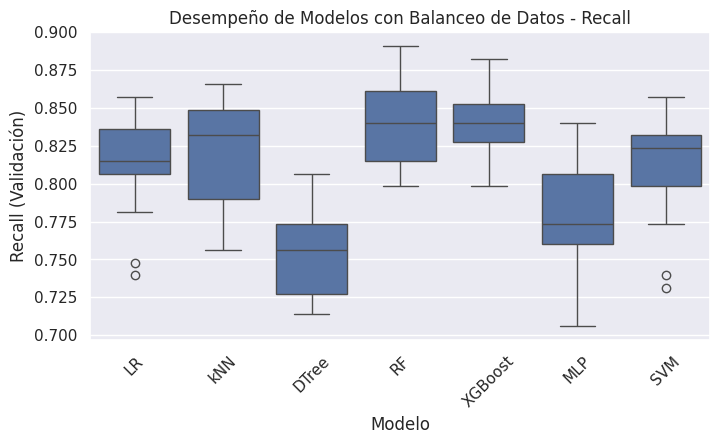

In [121]:
# Obtener un nuevo diagrama de caja y bigotes múltiple de todos los modelos con
# la técnica de submuestreo y/o sobremuestreo que hayas seleccionado, usando los
#  resultados de los conjuntos de validación y con respecto a la métrica que has
# considerado la mejor:



# ************* Inlcuye aquí tu código:******************************

Nonestr_mejor_metrica = "test_recall"

nombres_modelos = ["LR", "kNN", "DTree", "RF", "XGBoost", "MLP", "SVM"]

all_data = []
for i, modelo_resultados in enumerate(resultados):
    for score in modelo_resultados[str_mejor_metrica]:
        all_data.append({"Modelo": nombres_modelos[i], "Score": score})

df = pd.DataFrame(all_data)

sns.boxplot(x='Modelo', y='Score', data=df)
plt.title('Desempeño de Modelos con Balanceo de Datos - Recall')
plt.ylabel('Recall (Validación)')
plt.xlabel('Modelo')
plt.xticks(rotation=45)


# *********** Aquí termina la sección de agregar código *************


plt.show()

# **Parte III: Mejor modelo**

## **Ejercicio 18**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora, así como la métrica utilizada. Usando solamente este mejor modelo, busca si puedes mejorar el desempeño haciendo un mejor ajuste de los hiperparámetros y usando la métrica que consideraste la más importante para este problema. Verifica que tu modelo no esté sobreentrenado o subentrenado con dicha métrica.**

### **Incluye tu justificación de cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

De acuerdo a los resultados anteriores, podemos concluir que los modelos que obtuvieron métricas favorables sin sub o sobreentrenamiento fueron regresión logística y SVM.

Logistic Regression (LR):

- Recall en conjunto de entrenamiento: 0.830  

- Recall en conjunto de prueba: 0.813

Support Vector Machine (SVM):

- Recall en conjunto de entrenamiento: 0.827

- Recall en conjunto de prueba: 0.810

Ambos modelos muestran un desempeño similar en términos de recall en el conjunto de prueba, con LR ligeramente mejor que SVM. Sin embargo, también es importante considerar otros factores además del desempeño en el conjunto de prueba, como la interpretabilidad del modelo y la eficiencia computacional.

Al ser un ejercicio que su interpretabilidad es muy importante, nos inclinaremos por regresión logística.

### ++++++++ Termina la sección de agregar texto. +++++++++++

In [122]:
# Incluye todo el código que consideres necesario para que con el mejor
# modelo que tienes hasta ahora, puedas mejorar aún un poco más su
# desempeño con respecto a la métrica que estás utilizando:


# ************* Inlcuye aquí tu código:**************************
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos probar en la búsqueda de hiperparámetros
param_grid = {
    'm__penalty': ['l1', 'l2'],  # Tipo de regularización: l1 (Lasso) o l2 (Ridge)
    'm__C': [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'm__class_weight': ['balanced', None]  # Manejo de clases desbalanceadas
}

# Definimos el pipeline con la transformación y el modelo
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', LogisticRegression(solver='liblinear', random_state=0))])

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='recall', cv=5)

# Ajustamos el modelo a los datos de entrenamiento y búsqueda de los mejores hiperparámetros
grid_search.fit(Xtv_uosamp, ytv_uosamp)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostramos el mejor resultado de recall obtenido
print("Mejor recall:", grid_search.best_score_)


# *********** Aquí termina la sección de agregar código *************

Mejores hiperparámetros encontrados:
{'m__C': 0.1, 'm__class_weight': 'balanced', 'm__penalty': 'l1'}
Mejor recall: 0.8201680672268908


## **Ejercicio 19**

 Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior, utiliza
ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

a. Obtener la matriz de confusión.

b. El reporte de todas las métricas con el método “classification_report()” de sklearn.

c. Realiza un análisis de importancia de variables (feature importance) de este mejor
modelo con el conjunto de prueba (test), que incluya un gráfico de barras de los factores.

Incluye tus conclusiones al respecto y en particular indica si consideras razonables los
factores más importantes obtenidos.

In [123]:
print(lista_Xcat)

['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'telephone', 'foreign_worker']


In [124]:
Xtrain.info()

#La columna purpose está arrojando valores que la convierten en string.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 105 to 684
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   700 non-null    int64 
 1   duration                 700 non-null    int64 
 2   credit_history           700 non-null    int64 
 3   purpose                  700 non-null    object
 4   amount                   700 non-null    int64 
 5   savings                  700 non-null    int64 
 6   employment_duration      700 non-null    int64 
 7   installment_rate         700 non-null    int64 
 8   personal_status_sex      700 non-null    int64 
 9   other_debtors            700 non-null    int64 
 10  present_residence        700 non-null    int64 
 11  property                 700 non-null    int64 
 12  age                      700 non-null    int64 
 13  other_installment_plans  700 non-null    int64 
 14  housing                  700 non-null   

In [125]:
datoscat = Xtrain[lista_Xcat]
datoscat

#Aquí observamos que en la columa 'purpose' está el dato 'Other'

,status,credit_history,purpose,personal_status_sex,other_debtors,other_installment_plans,telephone,foreign_worker
105,4,2,0,3,3,3,2,2
68,2,2,3,2,1,3,2,2
479,2,2,Other,2,1,3,2,2
399,2,2,0,3,1,3,1,2
434,4,4,9,3,1,3,1,2
...,...,...,...,...,...,...,...,...
835,2,2,1,2,1,3,1,2
192,2,2,0,2,1,3,1,2
629,1,2,2,2,1,3,1,2
559,2,2,9,4,1,3,2,2


In [126]:
Xtrain['purpose'].unique()
#Confirmamos que está 'Other' haciendo esta columna de tipo de datos object/string.
#Se necesita transformar para correr el modelo

array([0, 3, 'Other', 9, 6, 2, 1], dtype=object)

In [127]:
#De acuerdo al diccionario, la categoría 'Others' en esta columna debe ser reemplazada por un 0.
#Aplicamos esto en el conjunto de entrenamiento y de prueba.
#$`verw = purpose`

 # 0 : others
 # 1 : car (new)
 # 2 : car (used)
 # 3 : furniture/equipment
 # 4 : radio/television
 # 5 : domestic appliances
 # 6 : repairs
 # 7 : education
 # 8 : vacation
 # 9 : retraining
 # 10 : business

Xtrain['purpose'] = Xtrain['purpose'].replace('Other', 0)
Xtest['purpose'] = Xtest['purpose'].replace('Other', 0)

In [128]:
Xtrain['purpose'].unique()

array([0, 3, 9, 6, 2, 1])

In [129]:
#Realizamos OneHotEncoder a las variables categóricas
#encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#Xtrain_encoded = encoder.fit_transform(Xtrain[lista_Xcat])

# Eliminar las columnas categóricas originales de Xtrain y concatenar las codificadas
#Xtrain_encoded = pd.DataFrame(Xtrain_encoded, columns=encoder.get_feature_names_out(lista_Xcat))
#Xtrain = pd.concat([Xtrain.drop(columns=lista_Xcat), Xtrain_encoded], axis=1)



In [130]:
Xtrain.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
105,4,24,2,0,1393,1,3,2,3,3,2,1,31,3,2,1,3,2,2,2
68,2,12,2,3,1567,1,3,1,2,1,1,3,22,3,2,1,3,2,2,2
479,2,18,2,0,3872,1,1,2,2,1,4,3,67,3,2,1,3,2,2,2
399,2,12,2,0,6078,1,4,2,3,1,2,3,32,3,2,1,3,2,1,2
434,4,12,4,9,1264,5,5,4,3,1,4,4,57,3,1,1,2,2,1,2


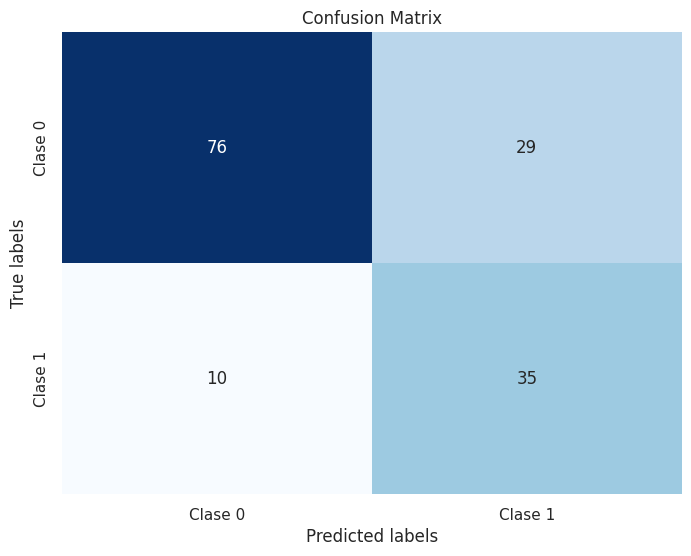

In [131]:
# Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio
# anterior, utiliza ahora (por primera vez en la actividad) el conjunto de
# prueba (test set) para:


# a.	Obtener la matriz de confusión.


# ************* Inlcuye aquí tu código:**************************

import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Definir los nombres de las clases
class_names = ["Clase 0", "Clase 1"]

# Definir el modelo con los mejores hiperparámetros
best_model = make_pipeline(LogisticRegression(solver='liblinear', random_state=0, C=0.1, class_weight='balanced', penalty='l1'))

# Entrenar el modelo con los datos de entrenamiento
best_model.fit(Xtrain, ytrain)

# Hacer predicciones sobre el conjunto de prueba
y_pred = best_model.predict(Xtest)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(ytest, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



# *********** Aquí termina la sección de agregar código *************

In [132]:
# b.	El reporte de todas las métricas con el método “classification_report()” de sklearn.


# ************* Inlcuye aquí tu código:**************************

report = classification_report(ytest, y_pred, target_names=class_names)
print(report)

# *********** Aquí termina la sección de agregar código *************

              precision    recall  f1-score   support

     Clase 0       0.88      0.72      0.80       105
     Clase 1       0.55      0.78      0.64        45

    accuracy                           0.74       150
   macro avg       0.72      0.75      0.72       150
weighted avg       0.78      0.74      0.75       150



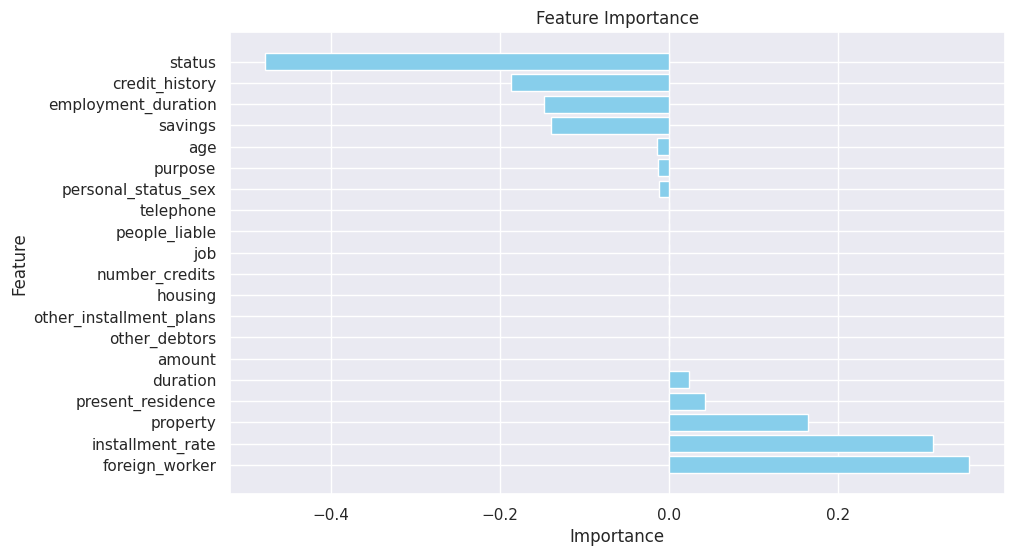

In [133]:
# c.	Realiza un análisis de importancia de variables (feature importance) de
# este mejor modelo con el conjunto de prueba (test), que incluya un gráfico de
# barras con la importancia de los factores. Incluye tus conclusiones al
# respecto y en particular indica si consideras razonables los factores más
# importantes obtenidos.

# ************* Inlcuye aquí tu código:**************************

# Obtener los coeficientes del modelo de Regresión Logística
coefficients = best_model.named_steps['logisticregression'].coef_[0]

# Crear un DataFrame con los coeficientes y los nombres de las características
feature_importance = pd.DataFrame({'Feature': Xtrain.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las variables con un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


# *********** Aquí termina la sección de agregar código *************

In [134]:
print(feature_importance)

                    Feature  Importance
19           foreign_worker    0.356133
7          installment_rate    0.312588
11                 property    0.164486
10        present_residence    0.043281
1                  duration    0.024335
4                    amount    0.000046
9             other_debtors    0.000000
13  other_installment_plans    0.000000
14                  housing    0.000000
15           number_credits    0.000000
16                      job    0.000000
17            people_liable    0.000000
18                telephone    0.000000
8       personal_status_sex   -0.011490
3                   purpose   -0.013297
12                      age   -0.013990
5                   savings   -0.140188
6       employment_duration   -0.148169
2            credit_history   -0.186835
0                    status   -0.478766


### **Incluye aquí tus comentarios sobre los factores más importantes obtenidos.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Las características con importancia positiva incluyen installment_rate, duration, property y foreign_worker. Esto significa que, en general, un mayor porcentaje de cuotas de crédito, una duración más larga del crédito, una clasificación de propiedad específica y el estatus de ser un trabajador extranjero están asociados con una mayor probabilidad de que un cliente sea considerado de alto riesgo crediticio.

En cambio, para las características con importancia negativa como age, employment_duration, savings, y credit_history, podría interpretarse que, a medida que la edad, la duración del empleo, el nivel de ahorro y el historial crediticio de un cliente aumentan o mejoran, es menos probable que ese cliente sea considerado de alto riesgo crediticio.

En algunos casos, una característica con importancia negativa puede ser algo deseable (por ejemplo, un tiempo mayor en un empleo puede indicar mayor estabilidad financiera), mientras que en otros casos puede ser indeseable (por ejemplo, una duración más larga del historial crediticio puede indicar una mayor exposición al riesgo, que podría asociarse a una edad avanzada también).

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 20**

### **Reporta tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++
En el reporte de IEEE se muestran los resultados obtenidos con el uso de distintas técnicas de rebalanceo de clases. Los mejores resultados que obtuvieron fue con la técnica de oversampling SMOTETomek y un modelo de GBDT (Tabla 13) con la cual obtuvieron un recall de 86.8%. En comparación, nuestro mejor modelo fue el de regresión logística el cual obtuvo un recall de 82.01% con una técnica de balanceo de SMOTE.


### ++++++++ Termina la sección de agregar texto. +++++++++++

>> ### **Fin de la Actividad South German Credit Card.**